In [0]:
import smtplib

# server = smtplib.SMTP('smtp.gmail.com', 587)
# server.starttls()
# server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

# msg = 'COLAB work finished!'
# server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
# server.quit()

In [0]:
import os, shutil

og_dataset_dir = '/content/drive/My Drive/Data/CatsvsDogs/Train'
base_dir = '/content/drive/My Drive/Data/CatsvsDogs_standardized'


In [0]:
# # just run once to make dir and copy files

train_dir = os.path.join(base_dir, 'train')
# os.mkdir(train_dir)

validation_dir = os.path.join(base_dir, 'validation')
# os.mkdir(validation_dir)

test_dir = os.path.join(base_dir, 'test')
# os.mkdir(test_dir)


cats_train_dir = os.path.join(train_dir, 'cats')
# os.mkdir(cats_train_dir)

dogs_train_dir = os.path.join(train_dir, 'dogs')
# os.mkdir(dogs_train_dir)

cats_validation_dir = os.path.join(validation_dir, 'cats')
# os.mkdir(cats_validation_dir)

dogs_validation_dir = os.path.join(validation_dir, 'dogs')
# os.mkdir(dogs_validation_dir)

cats_test_dir = os.path.join(test_dir, 'cats')
# os.mkdir(cats_test_dir)

dogs_test_dir = os.path.join(test_dir, 'dogs')
# os.mkdir(dogs_test_dir)

In [0]:
fnames = ['cat.{}.jpg'.format(i) for i in range(5000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_train_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['cat.{}.jpg'.format(i) for i in range(5000, 6000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_validation_dir, fname)
  shutil.copyfile(src=src, dst=dst)

  fnames = ['cat.{}.jpg'.format(i) for i in range(6000, 7000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(cats_test_dir, fname)
  shutil.copyfile(src=src, dst=dst)


fnames = ['dog.{}.jpg'.format(i) for i in range(5000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_train_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(5000, 6000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_validation_dir, fname)
  shutil.copyfile(src=src, dst=dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(6000, 7000)]

for  fname  in fnames:
  src = os.path.join(og_dataset_dir, fname)
  dst = os.path.join(dogs_test_dir, fname)
  shutil.copyfile(src=src, dst=dst)

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)

{}

In [0]:
%tensorflow_version 2.x

In [0]:
from tensorflow.keras import layers 
from tensorflow.keras import models

model = models.Sequential ()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

ERROR! Session/line number was not unique in database. History logging moved to new session 60
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________

In [0]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
for data_batch, labels_batch in train_generator:
  print('data batch shape: ', data_batch.shape)
  print('label batch shape: ', labels_batch.shape)
  break

data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)
data batch shape:  (20, 150, 150, 3)
label batch shape:  (20,)


KeyboardInterrupt: ignored

In [0]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=50, validation_data=validation_generator, validation_steps=50)

model.save('CatsvsDogs_small_1.h5')

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3489 - acc: 0.8530 - val_loss: 0.4200 - val_acc: 0.8070
Epoch 2/50
100/100 [==============================] - 15s 152ms/step - loss: 0.3448 - acc: 0.8425 - val_loss: 0.3703 - val_acc: 0.8340
Epoch 3/50
100/100 [==============================] - 15s 152ms/step - loss: 0.3229 - acc: 0.8570 - val_loss: 0.3860 - val_acc: 0.8260
Epoch 4/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3350 - acc: 0.8505 - val_loss: 0.3952 - val_acc: 0.8210
Epoch 5/50
100/100 [==============================] - 15s 150ms/step - loss: 0.3081 - acc: 0.8665 - val_loss: 0.3792 - val_acc: 0.8280
Epoch 6/50
100/100 [==============================] - 15s 150ms/step - loss: 0.3223 - acc: 0.8610 - val_loss: 0.4019 - val_acc: 0.8210
Epoch 7/50
100/100 [==============================] - 15s 151ms/step - loss: 0.3090 - acc: 0.8685 - val_loss: 0.4180 - val_acc: 0.8070
Epoch 8/50
100/100 [==============================] - 1

KeyboardInterrupt: ignored

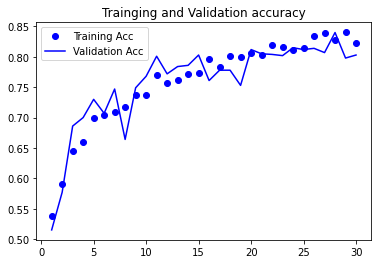

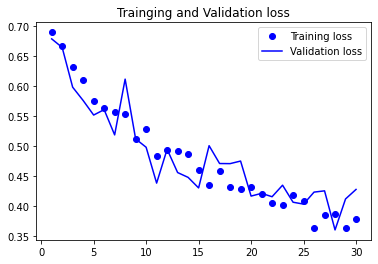

In [0]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
datagen = ImageDataGenerator(rotation_range=40, width_shift_range=.2, height_shift_range=.2, shear_range=.2, zoom_range=.2, horizontal_flip=True, fill_mode='nearest')

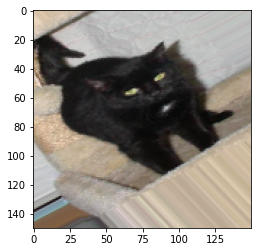

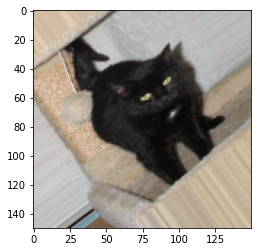

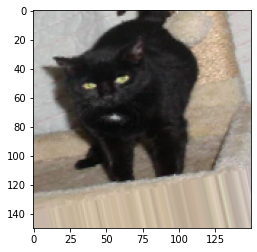

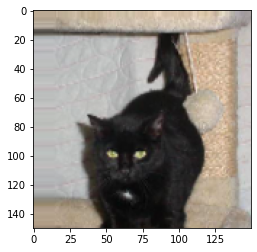

In [0]:
from keras.preprocessing import image 

fnames = [os.path.join(cats_train_dir, fname) for fname in os.listdir(cats_train_dir)]

img_path = fnames[3]

img = image.load_img(img_path, target_size=(150,150))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x, batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i += 1
  if (i % 4 == 0):
    break

plt.show()

In [0]:
model = models.Sequential ()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.35))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)      

In [0]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=.2, height_shift_range=.2, shear_range=.2, zoom_range=.2, horizontal_flip=True, fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
history = model.fit_generator(
  train_generator, 
  steps_per_epoch=100, 
  epochs=125, 
  validation_data=validation_generator, 
  validation_steps=50
)

model.save('CatsvsDogs_small_2.h5')

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6911 - acc: 0.5280 - val_loss: 0.6766 - val_acc: 0.5910
Epoch 2/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6831 - acc: 0.5505 - val_loss: 0.6739 - val_acc: 0.5690
Epoch 3/125
100/100 [==============================] - 25s 253ms/step - loss: 0.6763 - acc: 0.5675 - val_loss: 0.6661 - val_acc: 0.5740
Epoch 4/125
100/100 [==============================] - 26s 255ms/step - loss: 0.6577 - acc: 0.6030 - val_loss: 0.6431 - val_acc: 0.6060
Epoch 5/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6556 - acc: 0.6060 - val_loss: 0.6282 - val_acc: 0.6430
Epoch 6/125
100/100 [==============================] - 25s 251ms/step - loss: 0.6519 - acc: 0.6045 - val_loss: 0.6641 - val_acc: 0.5900
Epoch 7/125
100/100 [==============================] - 25s 254ms/step - loss: 0.6336 - acc: 0.6360 - val_loss: 0.6044 - val_acc: 0.6490
Epoch 8/125
100/100 [===========================

(221, b'2.0.0 closing connection z11sm8713014pfa.149 - gsmtp')

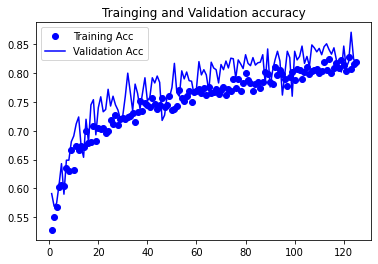

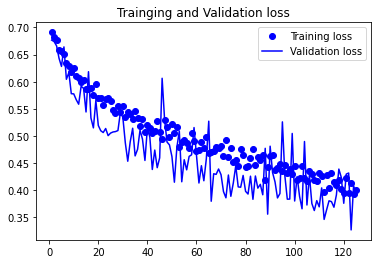

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
%tensorflow_version 2.x

In [0]:
import os
import shutil
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import smtplib

In [0]:
og_dataset_dir = '/content/drive/My Drive/Data/CatsvsDogs/Train'
base_dir = '/content/drive/My Drive/Data/CatsvsDogs_standardized'

In [0]:
train_dir = os.path.join(base_dir, 'train')

validation_dir = os.path.join(base_dir, 'validation')

test_dir = os.path.join(base_dir, 'test')

cats_train_dir = os.path.join(train_dir, 'cats')

dogs_train_dir = os.path.join(train_dir, 'dogs')

cats_validation_dir = os.path.join(validation_dir, 'cats')

dogs_validation_dir = os.path.join(validation_dir, 'dogs')

cats_test_dir = os.path.join(test_dir, 'cats')

dogs_test_dir = os.path.join(test_dir, 'dogs')

In [5]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

conv_base.summary()

58892288/58889256 [==============================] - 0s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
______________________________________________________________

In [0]:
import numpy as np

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory, 
      target_size=(150,150),
      batch_size=batch_size,
      class_mode='binary')
  
  i = 0
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i * batch_size : (i + 1) * batch_size] = features_batch
    labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if (i * batch_size >= sample_count):
      break
    
  return features, labels

In [8]:
train_features, train_labels = extract_features(train_dir, 10000)
validation_features, validtion_labels = extract_features(validation_dir, 2000)
test_features, test_labels = extract_features(test_dir, 2000)


Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
import numpy as np

train_features = np.reshape(train_features, (10000, 4*4*512))
validation_features = np.reshape(validation_features, (2000, 4*4*512))
test_features = np.reshape(test_features, (2000, 4*4*512))

In [10]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4*4*512))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5), loss='binary_crossentropy', metrics=['acc'])

history = model.fit(train_features, train_labels, epochs=30, batch_size=20, validation_data=(validation_features, validtion_labels))

Epoch 1/30
500/500 [==============================] - 2s 3ms/step - loss: 0.3987 - acc: 0.8139 - val_loss: 0.2820 - val_acc: 0.8850
Epoch 2/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2751 - acc: 0.8824 - val_loss: 0.2418 - val_acc: 0.9005
Epoch 3/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2451 - acc: 0.8951 - val_loss: 0.2251 - val_acc: 0.9040
Epoch 4/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2239 - acc: 0.9082 - val_loss: 0.2248 - val_acc: 0.9080
Epoch 5/30
500/500 [==============================] - 1s 3ms/step - loss: 0.2104 - acc: 0.9119 - val_loss: 0.2142 - val_acc: 0.9100
Epoch 6/30
500/500 [==============================] - 1s 3ms/step - loss: 0.1985 - acc: 0.9182 - val_loss: 0.2074 - val_acc: 0.9130
Epoch 7/30
500/500 [==============================] - 1s 3ms/step - loss: 0.1876 - acc: 0.9249 - val_loss: 0.2015 - val_acc: 0.9125
Epoch 8/30
500/500 [==============================] - 1s 3ms/step - loss: 0.

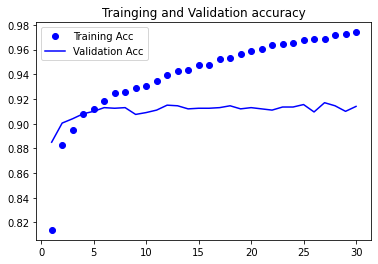

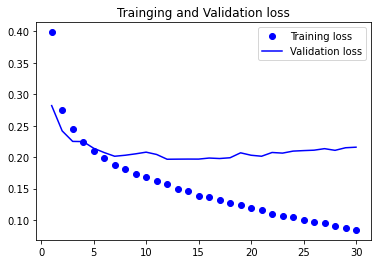

In [11]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [12]:
model = models.Sequential()

model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('Trainable weights: ', len(model.trainable_weights))
conv_base.trainable = False

Trainable weights:  30


In [14]:
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=.2, 
    height_shift_range=.2, 
    shear_range=.2, 
    zoom_range=.2, 
    horizontal_flip=True, 
    fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150,150), batch_size=20, class_mode='binary')

validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150,150), batch_size=20, class_mode='binary')

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [16]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
100/100 [==============================] - 21s 215ms/step - loss: 0.6024 - acc: 0.6770 - val_loss: 0.4287 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 21s 213ms/step - loss: 0.4730 - acc: 0.7940 - val_loss: 0.3874 - val_acc: 0.8270
Epoch 3/30
100/100 [==============================] - 21s 209ms/step - loss: 0.4496 - acc: 0.7935 - val_loss: 0.3171 - val_acc: 0.8680
Epoch 4/30
100/100 [==============================] - 21s 214ms/step - loss: 0.4071 - acc: 0.8160 - val_loss: 0.3079 - val_acc: 0.8740
Epoch 5/30
100/100 [==============================] - 21s 210ms/step - loss: 0.3915 - acc: 0.8330 - val_loss: 0.2839 - val_acc: 0.8830
Epoch 6/30
100/100 [==============================] - 22s 217ms/step - loss: 0.3735 - acc: 0.8370 - val_loss: 0.2778 - val_acc: 0.8740
Epoch 7/30
100/100 [==============================] - 21s 211ms/step - loss: 0.3662 - acc: 0.8340 - val_loss: 0.26

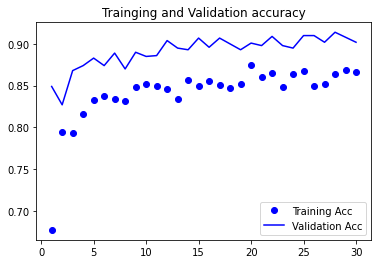

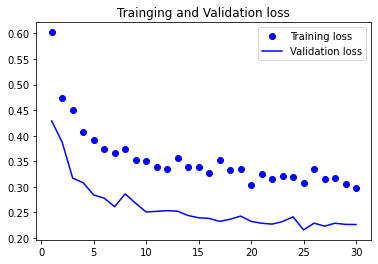

In [17]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
conv_base.trainable = True
set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy', 
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

In [20]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3275 - acc: 0.8535 - val_loss: 0.1887 - val_acc: 0.9230
Epoch 2/30
100/100 [==============================] - 22s 216ms/step - loss: 0.3014 - acc: 0.8740 - val_loss: 0.2020 - val_acc: 0.9150
Epoch 3/30
100/100 [==============================] - 21s 214ms/step - loss: 0.2694 - acc: 0.8860 - val_loss: 0.1868 - val_acc: 0.9160
Epoch 4/30
100/100 [==============================] - 22s 215ms/step - loss: 0.2875 - acc: 0.8810 - val_loss: 0.1891 - val_acc: 0.9190
Epoch 5/30
100/100 [==============================] - 22s 219ms/step - loss: 0.2843 - acc: 0.8810 - val_loss: 0.1780 - val_acc: 0.9260
Epoch 6/30
100/100 [==============================] - 21s 214ms/step - loss: 0.2415 - acc: 0.8980 - val_loss: 0.1437 - val_acc: 0.9380
Epoch 7/30
100/100 [==============================] - 21s 212ms/step - loss: 0.2438 - acc: 0.8940 - val_loss: 0.1982 - val_acc: 0.9150
Epoch 8/30
100/100 [==============================] - 2

(221, b'2.0.0 closing connection oy25sm2780749ejb.53 - gsmtp')

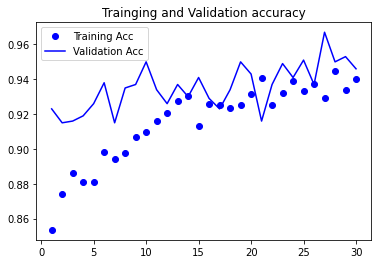

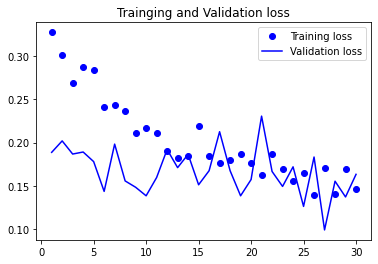

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

server = smtplib.SMTP('smtp.gmail.com', 587)
server.starttls()
server.login('alevera1113@gmail.com', 'drrhvsgjahppvzch')

msg = 'COLAB work finished!'
server.sendmail('alevera1113@gmail.com', 'alevera1113@gmail.com', msg)
server.quit()

Epoch 1/100
100/100 [==============================] - 22s 221ms/step - loss: 0.1211 - acc: 0.9525 - val_loss: 0.1935 - val_acc: 0.9470
Epoch 2/100
100/100 [==============================] - 21s 213ms/step - loss: 0.1203 - acc: 0.9530 - val_loss: 0.1722 - val_acc: 0.9530
Epoch 3/100
100/100 [==============================] - 21s 213ms/step - loss: 0.1286 - acc: 0.9535 - val_loss: 0.1415 - val_acc: 0.9530
Epoch 4/100
100/100 [==============================] - 21s 214ms/step - loss: 0.1214 - acc: 0.9525 - val_loss: 0.1297 - val_acc: 0.9540
Epoch 5/100
100/100 [==============================] - 22s 217ms/step - loss: 0.0927 - acc: 0.9595 - val_loss: 0.1028 - val_acc: 0.9670
Epoch 6/100
100/100 [==============================] - 21s 215ms/step - loss: 0.1299 - acc: 0.9495 - val_loss: 0.1439 - val_acc: 0.9520
Epoch 7/100
100/100 [==============================] - 21s 214ms/step - loss: 0.1125 - acc: 0.9585 - val_loss: 0.1830 - val_acc: 0.9380
Epoch 8/100
100/100 [===========================

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'b', label='Validation Acc')
plt.title('Trainging and Validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainging and Validation loss')
plt.legend()

plt.show()

In [0]:
test_generator = test_datagen.flow_from_directory(
    test_dir, 
    target_size=(150,150),
    batch_size=20,
    class_mode='binary')

test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print("acc: ", test_acc)
print("loss: ", test_loss)